In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,711 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and dire

In [11]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [12]:
!rm ~/.cache/matplotlib -rf

In [2]:
import tensorflow as tf

model = tf.keras.models.load_model(r'/content/drive/MyDrive/BugClassification/models/best_bug_model.h5')

In [3]:
import os
import glob
import numpy as np
from PIL import Image

def load_multiple_images(folder_path, target_size=(224, 224)):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
    images = []
    filenames = []

    for extension in image_extensions:
        files = glob.glob(os.path.join(folder_path, extension))
        files.extend(glob.glob(os.path.join(folder_path, extension.upper())))

        for file_path in files:
            try:
                img = Image.open(file_path)
                img = img.resize(target_size)
                img_array = np.array(img)

                # RGB로 변환 (RGBA인 경우)
                if img_array.shape[-1] == 4:
                    img_array = img_array[:, :, :3]

                # 그레이스케일을 RGB로 변환
                if len(img_array.shape) == 2:
                    img_array = np.stack([img_array] * 3, axis=-1)

                img_array = img_array / 255.0
                images.append(img_array)
                filenames.append(os.path.basename(file_path))

            except Exception as e:
                print(f"이미지 로드 실패 {file_path}: {e}")

    return np.array(images), filenames

# 사용 예시
folder_path = r'/content/drive/MyDrive/Bug/test_images/'
test_images, image_names = load_multiple_images(folder_path)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(images, predictions, filenames, class_names):
    n_images = len(images)
    cols = min(n_images, 5)  # 최대 5개까지만 한 줄에 표시

    fig, axes = plt.subplots(1, cols, figsize=(15, 3))

    # 이미지가 1개인 경우 axes를 리스트로 만들기
    if n_images == 1:
        axes = [axes]
    elif cols == 1:
        axes = [axes]

    for i in range(cols):
        if i < len(images):
            axes[i].imshow(images[i])

            # 예측 결과
            pred_class = np.argmax(predictions[i])
            confidence = predictions[i][pred_class] * 100  # 퍼센트로 변환

            title = f'{filenames[i]}\n{class_names[pred_class]}\nConfidence: {confidence:.1f}%'
            axes[i].set_title(title, fontsize=10)
            axes[i].axis('off')
        else:
            axes[i].axis('off')  # 빈 서브플롯은 숨기기

    plt.tight_layout()
    plt.show()

    # 모든 예측 결과를 텍스트로도 출력
    print("\n=== 전체 예측 결과 ===")
    for i, (filename, pred) in enumerate(zip(filenames, predictions)):
        pred_class = np.argmax(pred)
        confidence = pred[pred_class] * 100
        print(f"{i+1}. {filename}: {class_names[pred_class]} ({confidence:.2f}%)")

In [8]:
# 예측 수행
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [9]:
# 클래스 이름 (모델에 맞게 수정)
class_names = ['나방', '노린재', '담배가루이','무당벌레']  # 실제 클래스명으로 변경

/tmp/ipython-input-4166488197.py:30: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4166488197.py:30: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4166488197.py:30: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4166488197.py:30: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4166488197.py:30: UserWarning: Glyph 48268 (\N{HANGUL SYLLABLE BEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4166488197.py:30: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s)

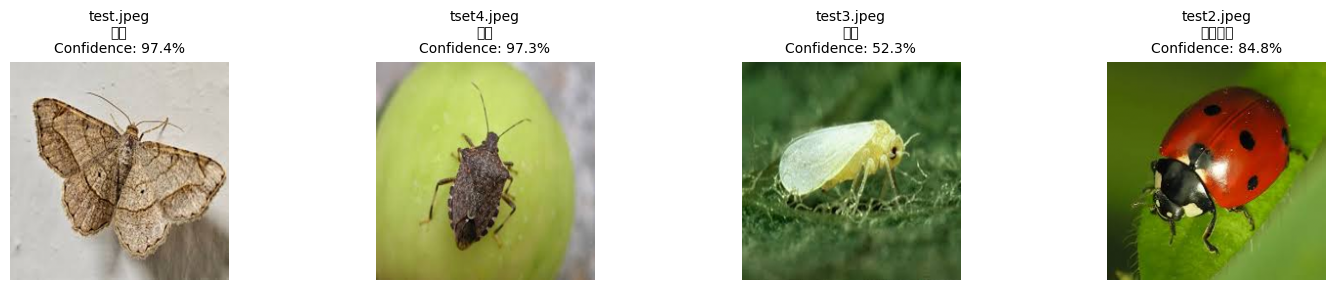


=== 전체 예측 결과 ===
1. test.jpeg: 나방 (97.39%)
2. tset4.jpeg: 나방 (97.32%)
3. test3.jpeg: 나방 (52.29%)
4. test2.jpeg: 무당벌레 (84.76%)


In [10]:
# 시각화 - 여기서 image_names를 사용
visualize_predictions(test_images, predictions, image_names, class_names)